In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

In [2]:
# First lets define a function that takes an input waist location and halfwidth and return Bmag
def bmag(x):
    waist = x[0]
    hw = x[1]
    z0 = 1.5
    dz = 0.5
    betas = 0.10
    N = 1500
    sigma = hw/(np.sqrt(2*np.log(2)))
    beta0 = betas+(z0+waist)**2/betas
    alpha0 = (z0+waist)/betas
    gb0 = 20000
    ne0 = 0.5
    dgdz0 = 16.7e9/me/1e6
    dgdz0 = 0.0
    z, frac = profile.plasma_gaussian_ramps(z0, dz, sigma, sigma, N, z0)
    ne = frac*ne0
    beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
    kp = 5.95074e4 * np.sqrt(ne0)
    kb = kp/np.sqrt(2*gb[-1])
    Bmag = 0.5*(beta[-1]*kb+gamma[-1]/kb)
    return Bmag

x0 = [-0.25, 0.20]
res = minimize(bmag, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
print('Optimal waist: %0.6f, Optimal hw: %0.6f' % (res.x[0], res.x[1]))

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 80
         Function evaluations: 156
Optimal waist: -0.384090, Optimal hw: 0.139480


In [3]:
hw = res.x[1]
waist = res.x[0]
z0 = 1.5
dz = 0.5
betas = 0.10
N = 3500
sigma = hw/(np.sqrt(2*np.log(2)))
beta0 = betas+(z0+waist)**2/betas
alpha0 = (z0+waist)/betas
gb0 = 20000
ne0 = 0.5
dgdz0 = 16.7e9/me/1e6
dgdz0 = 0.0
z, frac = profile.plasma_gaussian_ramps(z0, dz, sigma, sigma, N, 2*z0+dz)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
kp = 5.95074e4 * np.sqrt(ne0)
kb = kp/np.sqrt(2*gb0)
betaIn = (z-z0-waist)**2/betas + betas

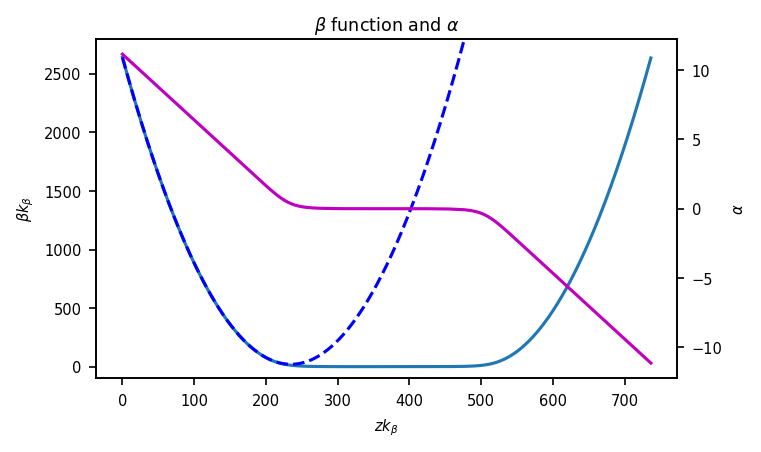

In [4]:
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z*kb, beta*kb)
plt.plot(z*kb, betaIn*kb, 'b--')
plt.title(r'$\beta$ function and $\alpha$')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta$')
plt.ylim(-100, 2800)
plt.twinx()
plt.plot(z*kb, alpha, 'm')
plt.ylabel(r'$\alpha$')
plt.show()

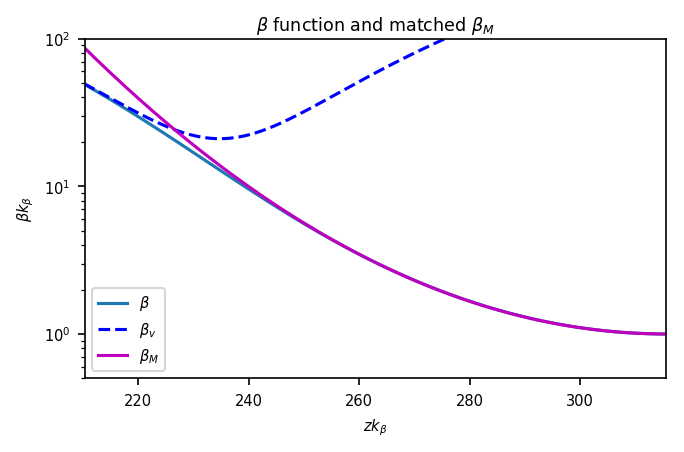

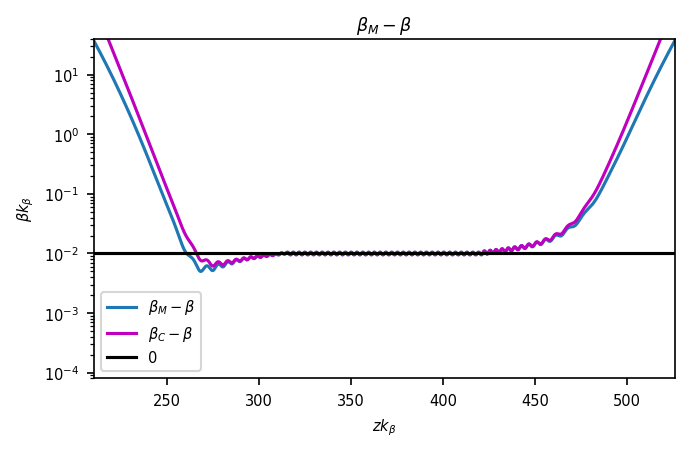

In [5]:
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z*kb, beta*kb)
plt.plot(z*kb, betaIn*kb, 'b--')
plt.plot(z*kb, 1/np.sqrt(frac), 'm')
#plt.plot(z*kb, beta*kb/2 +(np.array(alpha)**2+1)/(2*frac*beta*kb), 'g')
plt.title(r'$\beta$ function and matched $\beta_M$')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta$')
plt.legend([r'$\beta$', r'$\beta_v$', r'$\beta_M$'])
plt.yscale('log')
plt.xlim(1*kb, 1.5*kb)
plt.ylim(5e-1, 1e2)
plt.show()

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z*kb, 1/np.sqrt(frac)-beta*kb+0.01)
plt.plot(z*kb, beta*kb/2 +(np.array(alpha)**2+1)/(2*frac*beta*kb) - beta*kb+0.01, 'm')
plt.plot([0, 1000], [0.01, 0.01], 'k')
plt.title(r'$\beta_M-\beta$')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta$')
plt.legend([r'$\beta_M-\beta$', r'$\beta_C-\beta$', r'0'])
plt.yscale('log')
plt.xlim(1*kb, 2.5*kb)
plt.ylim(8e-5, 40)
plt.show()

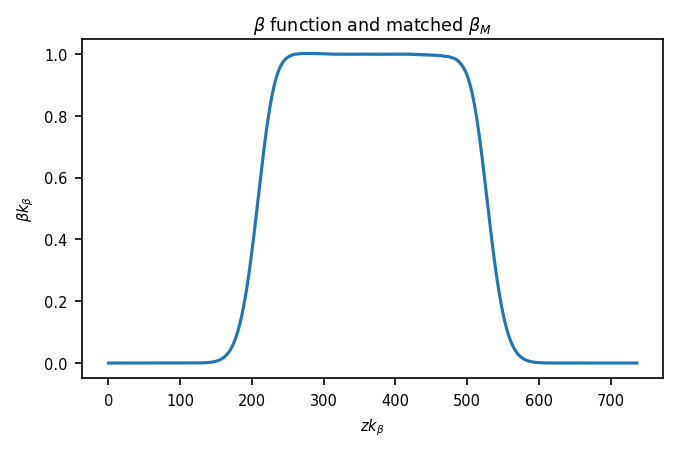

In [6]:
kbe = kb*np.sqrt(frac)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z*kb, beta*kbe)
plt.title(r'$\beta$ function and matched $\beta_M$')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta$')
plt.ylim(-0.05, 1.05)
plt.show()

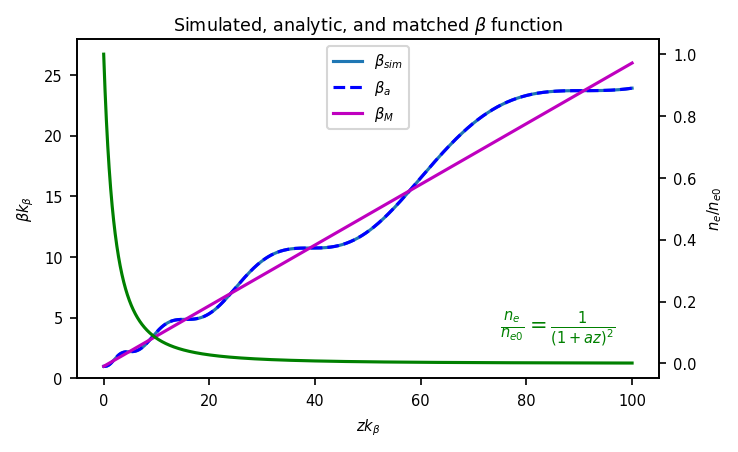

In [7]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.25
z = np.linspace(0, 100, N)
frac = 1/(1+a*z)**2
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta)
plt.plot(z, (1+a*z)*(1+1/(4/a**2-1)-1/(4/a**2-1)*np.cos(np.log(1+a*z)*np.sqrt(4/a**2-1))
                     -1/np.sqrt(4/a**2-1)*np.sin(np.log(1+a*z)*np.sqrt(4/a**2-1))), 'b--')
plt.plot(z, 1/np.sqrt(frac), 'm')
plt.title(r'Simulated, analytic, and matched $\beta$ function')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta$')
plt.legend([r'$\beta_{sim}$', r'$\beta_{a}$', r'$\beta_M$'], loc=9)
plt.ylim(0, 28)
plt.twinx()
plt.plot(z, frac, 'g')
plt.ylabel(r'$n_{e}/n_{e0}$')
plt.text(75, 0.1, r'$\frac{n_e}{n_{e0}}=\frac{1}{(1+az)^2}$', color='green', fontsize=10)
plt.show()

Optimization terminated successfully.
         Current function value: 1.003090
         Iterations: 77
         Function evaluations: 165
Optimal waist: -96.148383, Optimal a: 0.232564


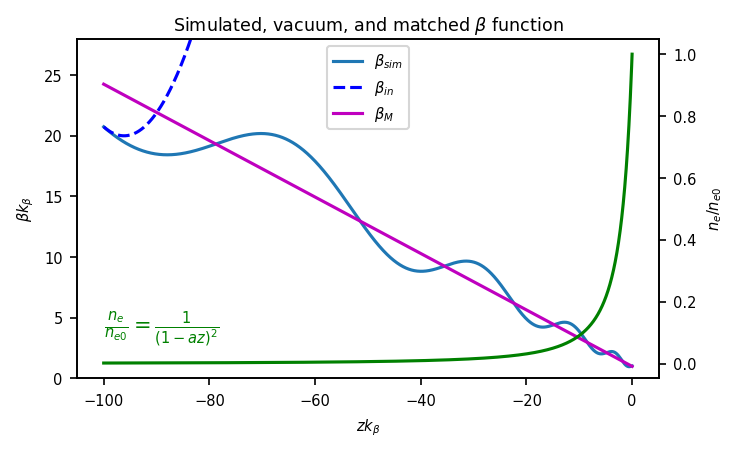

In [8]:
def plot_ramp(func, string, x0, z0, text=-100):
    # First lets define a function that takes an input waist location and halfwidth and return Bmag
    betas = 20
    N = 1500
    gb0 = 20000
    ne0 = 2*gb0/5.95074e4**2
    dgdz0 = 0.0
    z = np.linspace(-z0, 0, N)
    def bmag(x):
        waist = x[0]
        a = x[1]
        beta0 = betas+(z0+waist)**2/betas
        alpha0 = (z0+waist)/betas
        frac = func(z, a)
        ne = frac*ne0
        beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
        Bmag = 0.5*(beta[-1]+gamma[-1])
        return Bmag

    res = minimize(bmag, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
    print('Optimal waist: %0.6f, Optimal a: %0.6f' % (res.x[0], res.x[1]))
    N = 3500
    beta0 = betas+(z0+res.x[0])**2/betas
    alpha0 = (z0+res.x[0])/betas
    a = res.x[1]
    z = np.linspace(-z0, 0, N)
    frac = func(z, a)
    ne = frac*ne0
    beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
    betaIn = (z-res.x[0])**2/betas + betas

    plt.figure(figsize=(5, 3), dpi=150)
    plt.plot(z, beta)
    plt.plot(z, betaIn, 'b--')
    plt.plot(z, 1/np.sqrt(frac), 'm')
    plt.title(r'Simulated, vacuum, and matched $\beta$ function')
    plt.xlabel(r'$z k_\beta$')
    plt.ylabel(r'$\beta k_\beta$')
    plt.legend([r'$\beta_{sim}$', r'$\beta_{in}$', r'$\beta_M$'], loc=9)
    plt.ylim(0, 28)
    plt.twinx()
    plt.plot(z, frac, 'g')
    plt.ylabel(r'$n_{e}/n_{e0}$')
    plt.text(text, 0.1, string, color='green', fontsize=10)
    plt.show()

func = lambda z, a: 1/(1-a*z)**2
plot_ramp(func, r'$\frac{n_e}{n_{e0}}=\frac{1}{(1-az)^2}$', [-80, 0.2], 100)

Optimization terminated successfully.
         Current function value: 1.000556
         Iterations: 72
         Function evaluations: 154
Optimal waist: -78.023584, Optimal a: 24.062976


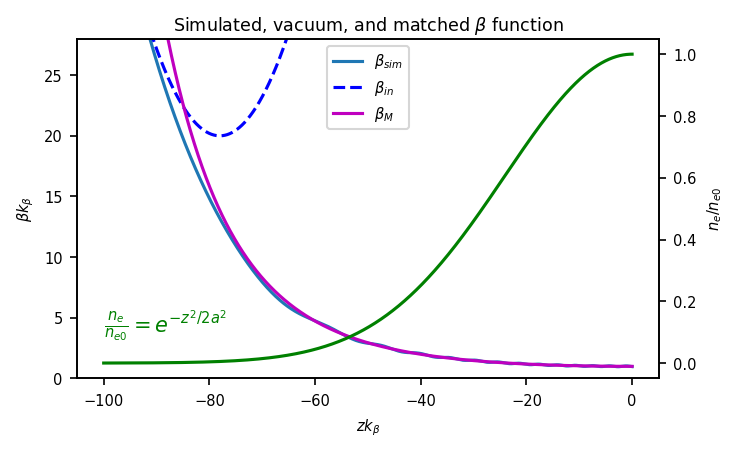

In [9]:
func = lambda z, a: np.exp(-z**2/(2*a**2))
plot_ramp(func, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', [-80, 25], 100)

In [10]:
# Add some wiggly bits to the Gaussian


Optimization terminated successfully.
         Current function value: 1.434192
         Iterations: 123
         Function evaluations: 239
Optimal waist: -93.110548, Optimal a: 0.009888


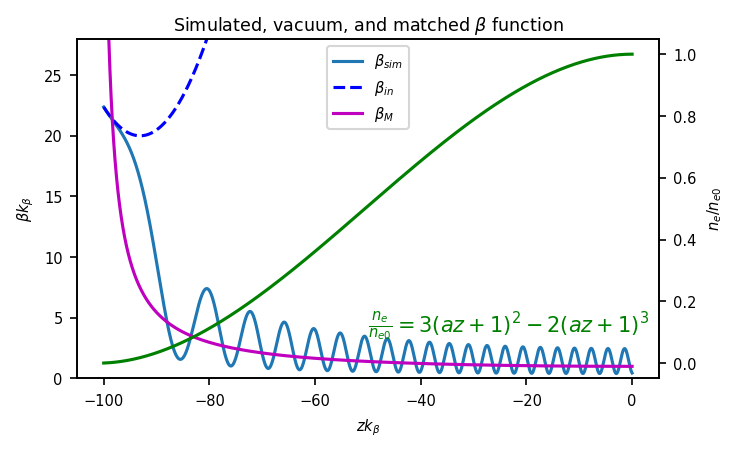

In [11]:
1+2*(a*z)**3-3*(a*z)**2
func = lambda z, a: np.piecewise(z, [z>=-1/a, z<-1/a], [lambda z: 3*(a*z+1)**2-2*(a*z+1)**3, 0])
plot_ramp(func, r'$\frac{n_e}{n_{e0}}=3(az+1)^2-2(az+1)^3$', [-80, 0.1], 100, -50)

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 133
         Function evaluations: 267
Optimal waist: -604.024605, Optimal a: 0.001602


/home/robert/anaconda3/envs/CU-PWFA/lib/python3.6/site-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in true_divide


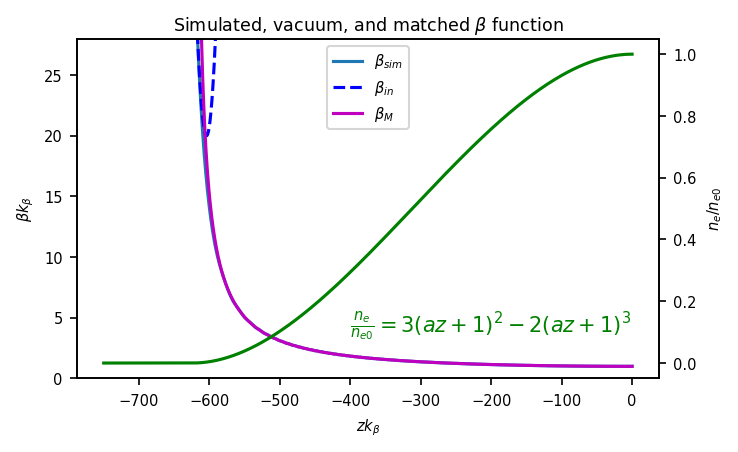

In [12]:
func = lambda z, a: np.piecewise(z, [z>=-1/a, z<-1/a], [lambda z: 3*(a*z+1)**2-2*(a*z+1)**3, 0])
plot_ramp(func, r'$\frac{n_e}{n_{e0}}=3(az+1)^2-2(az+1)^3$', [-600, 0.001], 750, -400)

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 65
         Function evaluations: 138
Optimal waist: -35.197111, Optimal a: 3.174617


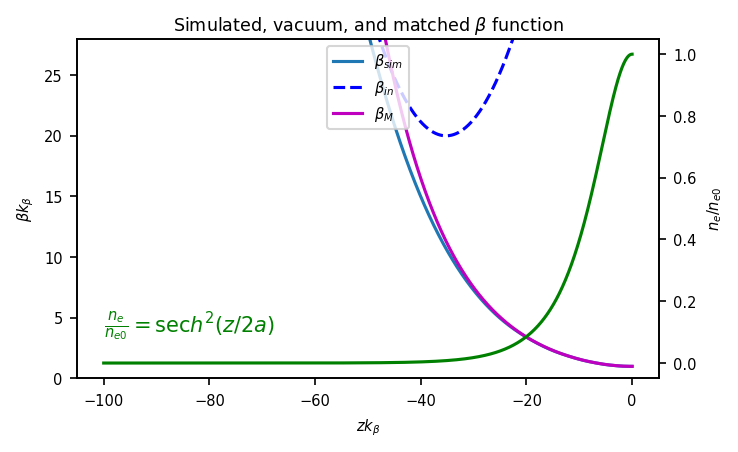

In [13]:
func = lambda z, a: 2/(np.exp(z/(2*a))+np.exp(-z/(2*a)))
plot_ramp(func, r'$\frac{n_e}{n_{e0}}=\sech^2(z/2a)$', [-40, 3], 100)

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 71
         Function evaluations: 143
Optimal waist: -97.840015, Optimal a: 0.199553


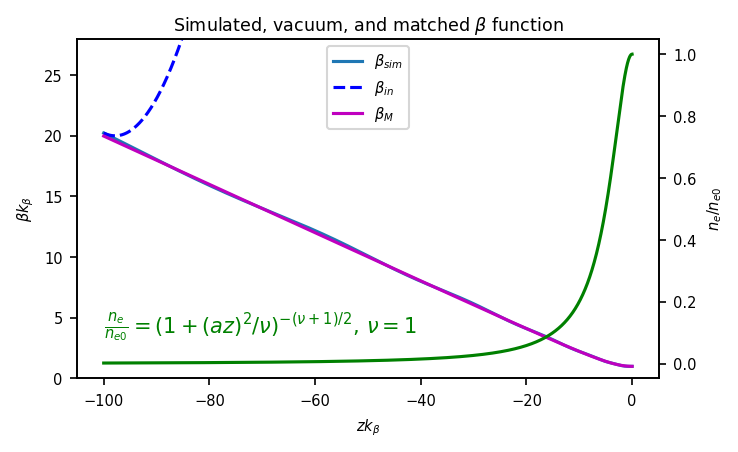

In [14]:
nu = 1
func = lambda z, a: (1+(a*z)**2/nu)**(-(nu+1)/2)
plot_ramp(func, r'$\frac{n_e}{n_{e0}}=(1+(az)^2/\nu)^{-(\nu+1)/2}$, $\nu=1$', [-80, 0.25], 100)

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 75
         Function evaluations: 155
Optimal waist: -11.792651, Optimal a: 0.255090


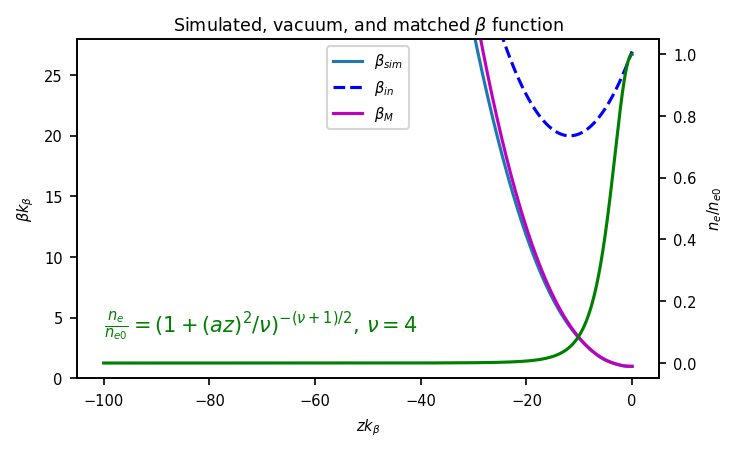

In [15]:
nu = 4
func = lambda z, a: (1+(a*z)**2/nu)**(-(nu+1)/2)
plot_ramp(func, r'$\frac{n_e}{n_{e0}}=(1+(az)^2/\nu)^{-(\nu+1)/2}$, $\nu=4$', [-80, 0.25], 100)

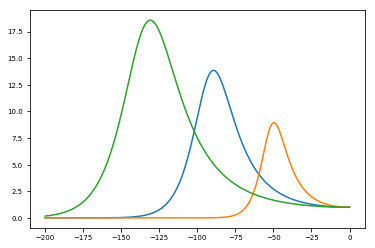

In [16]:
z = np.linspace(-200, 0, 500)
Bs = lambda z, a: 16*np.exp(-5*z**2/(4*a**2))/(z**2/a**4*np.exp(-z**2/a**2)+16*np.exp(-3*z**2/(2*a**2)))
plt.plot(z, Bs(z, 25), z, Bs(z, 15), z, Bs(z, 35))
plt.show()